In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
from ast import literal_eval

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
#load the WCN/RSA/Conservation information data 
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/FigureS3/"

In [7]:
ss_data = pd.read_csv(readdata_dir + "RSAWCNConservationInterfaceFile/EachSiteInformation.txt", sep = "\t")
ss_data

,site,WCN,RSA,conservation,if_loop,if_helix,if_strand,if_interface
0,3,1.778229,94.170404,0.032790,1,0,0,0
1,4,2.171661,26.425926,0.885598,1,0,0,0
2,5,2.199161,49.435028,0.211922,0,0,1,0
3,6,2.240886,12.726098,0.556965,0,0,1,0
4,7,2.220242,51.285240,0.209815,0,0,1,0
...,...,...,...,...,...,...,...,...
207,215,2.649048,11.094961,0.748958,1,0,0,1
208,216,2.558948,13.347458,0.932306,1,0,0,1
209,217,2.401056,19.190705,0.850515,1,0,0,1
210,218,2.374906,40.493295,0.343016,1,0,0,1


In [34]:
wcn24_data = pd.read_csv(readdata_dir +  "RSAWCNConservationInterfaceFile/WCN_24honomers.txt", sep = ",",index_col=0)
wcn24_data

,3,4,5,6,7,8,9,10,11,12,...,210,211,212,213,214,215,216,217,218,219
0,1.778114,2.171622,2.199079,2.240707,2.219893,2.311294,2.206612,2.338378,2.215814,2.335406,...,2.058886,2.252248,2.428144,2.617651,2.672500,2.648583,2.558771,2.400920,2.374894,2.451625
1,1.778195,2.171655,2.198984,2.240623,2.219823,2.311164,2.206397,2.338115,2.215432,2.334619,...,2.059060,2.252322,2.428252,2.617773,2.672798,2.648979,2.559013,2.401132,2.375159,2.451856
2,1.777158,2.170489,2.198518,2.240272,2.220043,2.311615,2.207378,2.339225,2.217080,2.336710,...,2.053650,2.245843,2.422755,2.611112,2.666164,2.641578,2.552479,2.394333,2.369248,2.447318
3,1.777910,2.171248,2.198732,2.240464,2.219700,2.311111,2.206366,2.338049,2.215552,2.334905,...,2.058731,2.252038,2.428142,2.617522,2.672609,2.648795,2.559056,2.401165,2.375311,2.451863
4,1.778080,2.171479,2.198949,2.240548,2.219977,2.311360,2.206781,2.338326,2.215264,2.333952,...,2.058435,2.251458,2.427434,2.616784,2.671471,2.647271,2.557765,2.399864,2.373878,2.450848
5,1.778207,2.171642,2.199072,2.240710,2.220083,2.311605,2.206942,2.338740,2.215834,2.334977,...,2.059144,2.252429,2.428457,2.618015,2.672924,2.649116,2.558828,2.401226,2.374917,2.451740
6,1.777739,2.171124,2.198707,2.240222,2.219685,2.310964,2.206365,2.337777,2.214697,2.332833,...,2.056485,2.249082,2.425236,2.614466,2.669026,2.644451,2.553404,2.396442,2.370705,2.448706
7,1.780734,2.174487,2.202366,2.244726,2.224678,2.316994,2.213147,2.346053,2.224482,2.345981,...,2.060380,2.253307,2.430007,2.619124,2.674214,2.649593,2.563167,2.404625,2.379609,2.455604
8,1.778200,2.171722,2.199186,2.240892,2.220196,2.311767,2.207162,2.338795,2.215854,2.334674,...,2.058793,2.251861,2.428088,2.617528,2.672492,2.648580,2.559184,2.401078,2.375076,2.451740
9,1.777835,2.171180,2.198628,2.240324,2.219646,2.311251,2.206780,2.338698,2.215992,2.336038,...,2.058713,2.252322,2.427879,2.617831,2.672837,2.649808,2.560013,2.399802,2.372783,2.450448


In [35]:
conserveation_data = pd.read_csv(readdata_dir + "RSAWCNConservationInterfaceFile/ConservationScore.txt", sep = "\t")
conserveation_data

,position,entropy,gap_fr,score,segment
0,0,0.885211668761,0.696429,0.034846,NaN
1,1,0.819457692818,0.504718,0.089419,NaN
2,2,0.82591947666,0.811640,0.032790,NaN
3,3,0.0607611278345,0.057111,0.885598,NaN
4,4,0.781385443197,0.030615,0.211922,NaN
...,...,...,...,...,...
215,215,0.0594764410241,0.008738,0.932306,NaN
216,216,0.141831282703,0.008919,0.850515,NaN
217,217,0.650282934751,0.019162,0.343016,NaN
218,218,0.23604839728,0.019851,0.748786,NaN


In [36]:
RSA24_data = pd.read_csv(readdata_dir + "RSAWCNConservationInterfaceFile/RSA_ASA.txt",sep = "\t")
RSA24_data

,ASA,position,aa,RAS,S.D.
0,210.000000,3,E,94.170404,0.011730
1,59.458333,4,Q,26.425926,0.025346
2,116.666667,5,K,49.435028,0.023084
3,16.416667,6,A,12.726098,0.021622
4,103.083333,7,L,51.285240,0.011022
...,...,...,...,...,...
207,19.083333,215,T,11.094961,0.011403
208,31.500000,216,K,13.347458,0.020734
209,19.958333,217,G,19.190705,0.018638
210,70.458333,218,V,40.493295,0.020250


In [37]:
#load the secondary structure information data 
ss_infoData = pd.read_csv(readdata_dir + "RSAWCNConservationInterfaceFile/His3_disordered_region.csv",sep = ",")
structure_position_dict = {}
helix_symbol = ["H","I","G"]
strand_symbol = ["E","B"]

for row in range(ss_infoData.shape[0]):
    position_site = ss_infoData["position"].values[row]
    structure_single = ss_infoData["structure"].values[row]
    if structure_single in helix_symbol:
        structure_position_dict[position_site] = "Helix"
    elif structure_single in strand_symbol:
        structure_position_dict[position_site] = "Strand"
    else:
        structure_position_dict[position_site] = "Instability "

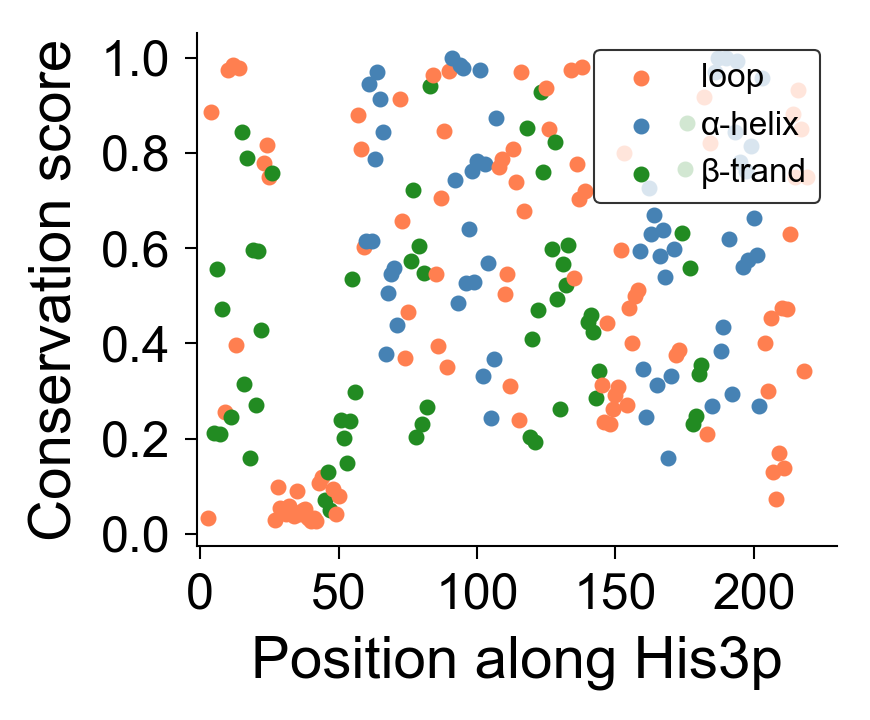

In [49]:
#plot the distribution of WCN/RSA/Conservation along his3p
plt.figure(figsize=(3.0,2.5))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for row in range(conserveation_data.shape[0]):
    single_site = conserveation_data.iloc[row,:]["position"]+1
    if (single_site < 3) | (single_site > 219):
        continue 
    if structure_position_dict[single_site] == 'Instability ':
        p1 = plt.scatter(single_site,conserveation_data["score"].values[row],\
       s=8,color="coral",label="loop")
    if structure_position_dict[single_site] == 'Helix':
        p2 =plt.scatter(single_site,conserveation_data["score"].values[row],\
       s=8,color="steelblue",label="α-helix")    
    if structure_position_dict[single_site] == 'Strand':
        p3 = plt.scatter(single_site,conserveation_data["score"].values[row],\
       s=8,color="forestgreen",label="β-trand")
legend  = plt.legend([p1, p2,p3], ['loop ', 'α-helix','β-trand'],loc='upper right', scatterpoints=1,edgecolor='black',fontsize=8,
      )    
legend = legend.get_frame().set_linewidth(0.5)
plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)
plt.ylabel("Conservation score",fontsize=14)
plt.xlabel("Position along His3p",fontsize = 14)


#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)
#save figure
plt.xlim([-1,230])
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "conservation_distribution.png",dpi = 300)
plt.show()


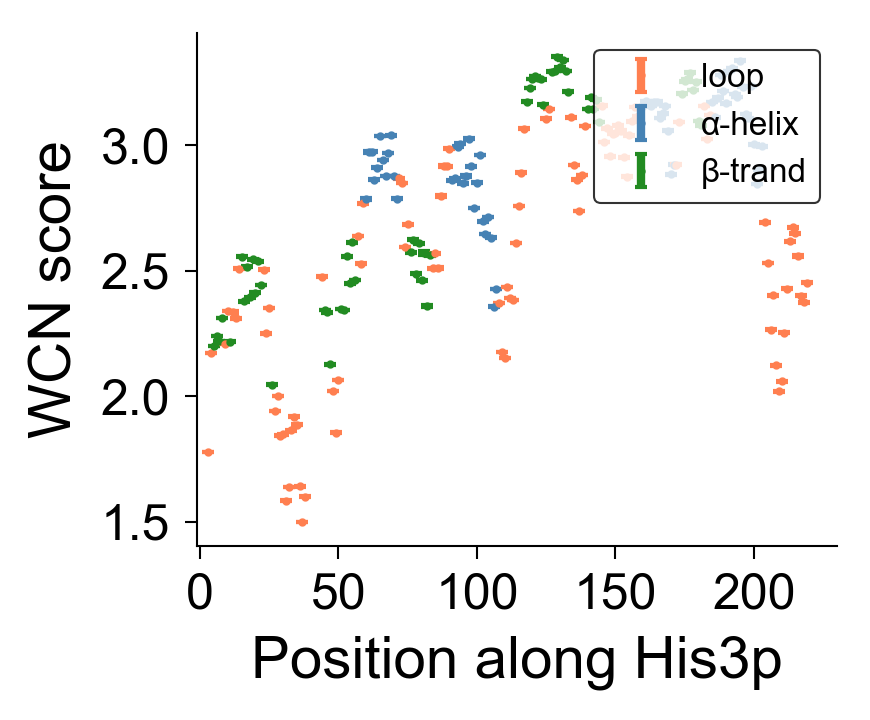

In [71]:
plt.figure(figsize=(3.0,2.5))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for single_col in wcn24_data.columns:
    single_site = int(single_col)
    if (single_site < 3) | (single_site > 219):
        continue     
    if structure_position_dict[single_site] == 'Instability ':
        p1 = plt.errorbar(single_site,wcn24_data.loc["mean",single_col],\
        yerr=wcn24_data.loc["standard deviation",single_col],\
        fmt=".",ecolor='coral',elinewidth=2.0,capsize=1.5,ms=2,color="coral",label="loop")
    if structure_position_dict[single_site] == 'Helix':
        p2 = plt.errorbar(single_site,wcn24_data.loc["mean",single_col],\
        yerr=wcn24_data.loc["standard deviation",single_col],\
        fmt=".",ecolor='steelblue',elinewidth=2.0,capsize=1.5,ms=2,color="steelblue",label="α-helix")    
    if structure_position_dict[single_site] == 'Strand':
        p3 = plt.errorbar(single_site,wcn24_data.loc["mean",single_col],\
        yerr=wcn24_data.loc["standard deviation",single_col],\
        fmt=".",ecolor='forestgreen',elinewidth=2.0,capsize=1.5,ms=2,color="forestgreen",label="β-trand")
legend  = plt.legend([p1, p2,p3], ['loop ', 'α-helix','β-trand'],loc='upper right', scatterpoints=1,edgecolor='black',fontsize=8,
      )    
legend = legend.get_frame().set_linewidth(0.5)
plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)
plt.ylabel("WCN score",fontsize=14)
plt.xlabel("Position along His3p",fontsize = 14)


#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)
#save figure
plt.xlim([-1,230])
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "wcn_distribution.png",dpi = 300)
plt.show()


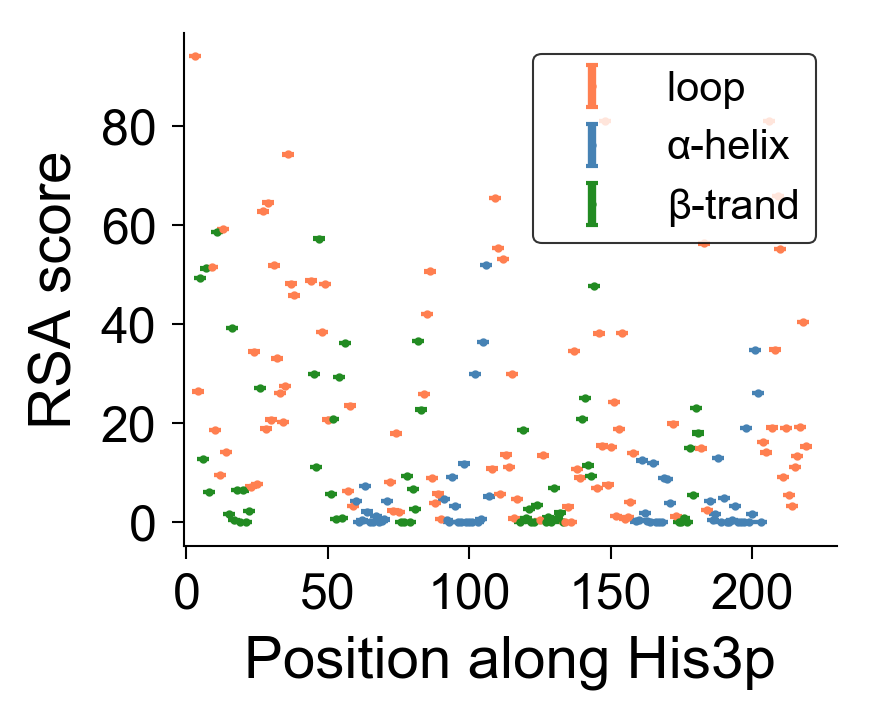

In [76]:
plt.figure(figsize=(3.0,2.5))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for row in range(RSA24_data.shape[0]):
    single_site = RSA24_data.iloc[row,:]["position"]
    if structure_position_dict[single_site] == 'Instability ':
        p1 = plt.errorbar(single_site,RSA24_data["RAS"].values[row],\
        yerr=RSA24_data["S.D."].values[row],\
        fmt=".",ecolor='coral',elinewidth=2.0,capsize=1.5,ms=2,color="coral",label="loop")
    if structure_position_dict[single_site] == 'Helix':
        p2 = plt.errorbar(single_site,RSA24_data["RAS"].values[row],\
        yerr=RSA24_data["S.D."].values[row],\
        fmt=".",ecolor='steelblue',elinewidth=2.0,capsize=1.5,ms=2,color="steelblue",label="α-helix")    
    if structure_position_dict[single_site] == 'Strand':
        p3 = plt.errorbar(single_site,RSA24_data["RAS"].values[row],\
        yerr=RSA24_data["S.D."].values[row],\
        fmt=".",ecolor='forestgreen',elinewidth=2.0,capsize=1.5,ms=2,color="forestgreen",label="β-trand")
legend  = plt.legend([p1, p2,p3], ['loop ', 'α-helix','β-trand'],loc='upper right', scatterpoints=1,edgecolor='black',fontsize=10,
      )    
legend = legend.get_frame().set_linewidth(0.5)
plt.xticks(fontsize = 12)

plt.yticks(fontsize = 12)
plt.ylabel("RSA score",fontsize=14)
plt.xlabel("Position along His3p",fontsize = 14)


#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)

ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=3)
#save figure
plt.xlim([-1,230])
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "RSA_dis.png",dpi = 300)
plt.show()
